In [1]:
#we will try to extract some insights from a dataset that contains details about the background of a person who is purchasing
#medical insurance along with what amount of premium is charged to those 
#individuals as well using Machine Learning in Python.



In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


In [3]:
#Now let’s use the panda’s data frame to load the dataset and look at the 
#first five rows of it.


df=pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
#This dataset contains 1338 data points with 6 independent features and 1 target feature(charges).
# we can see that the dataset contains 2 columns with float values 3 with categorical values and the rest contains integer values.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
#We can look at the descriptive statistical measures of the continuous data available in the dataset.Q
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
#EDA is an approach to analyzing the data using visual techniques. It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations. While performing the EDA of this dataset we will try to look at what is the relation between the independent features that is how one affects the other.

df.isnull().sum()

#So, here we can conclude that there are no null values in the dataset given.

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

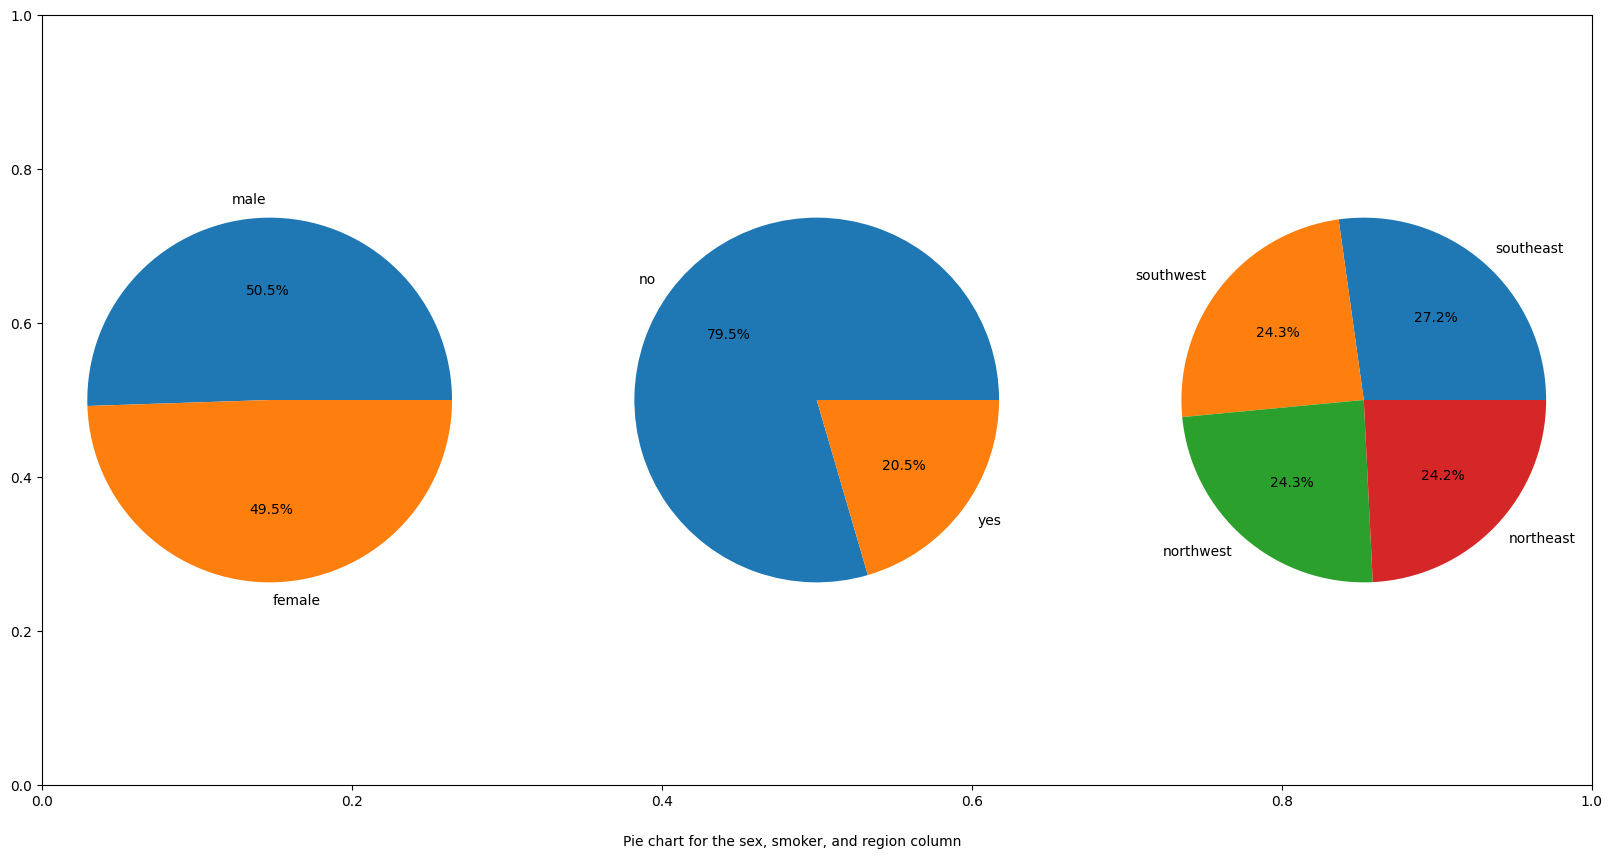

In [7]:
features = ['sex', 'smoker', 'region']
 
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)
 
    x = df[col].value_counts()
    plt.pie(x.values,
            labels=x.index,
            autopct='%1.1f%%')
    
plt.figtext(0.5, 0.05, "Pie chart for the sex, smoker, and region column", ha="center")
plt.show()

#The data provided to us is equally distributed among the sex and the region columns but in the smoker column, we can observe a ratio of 80:20.

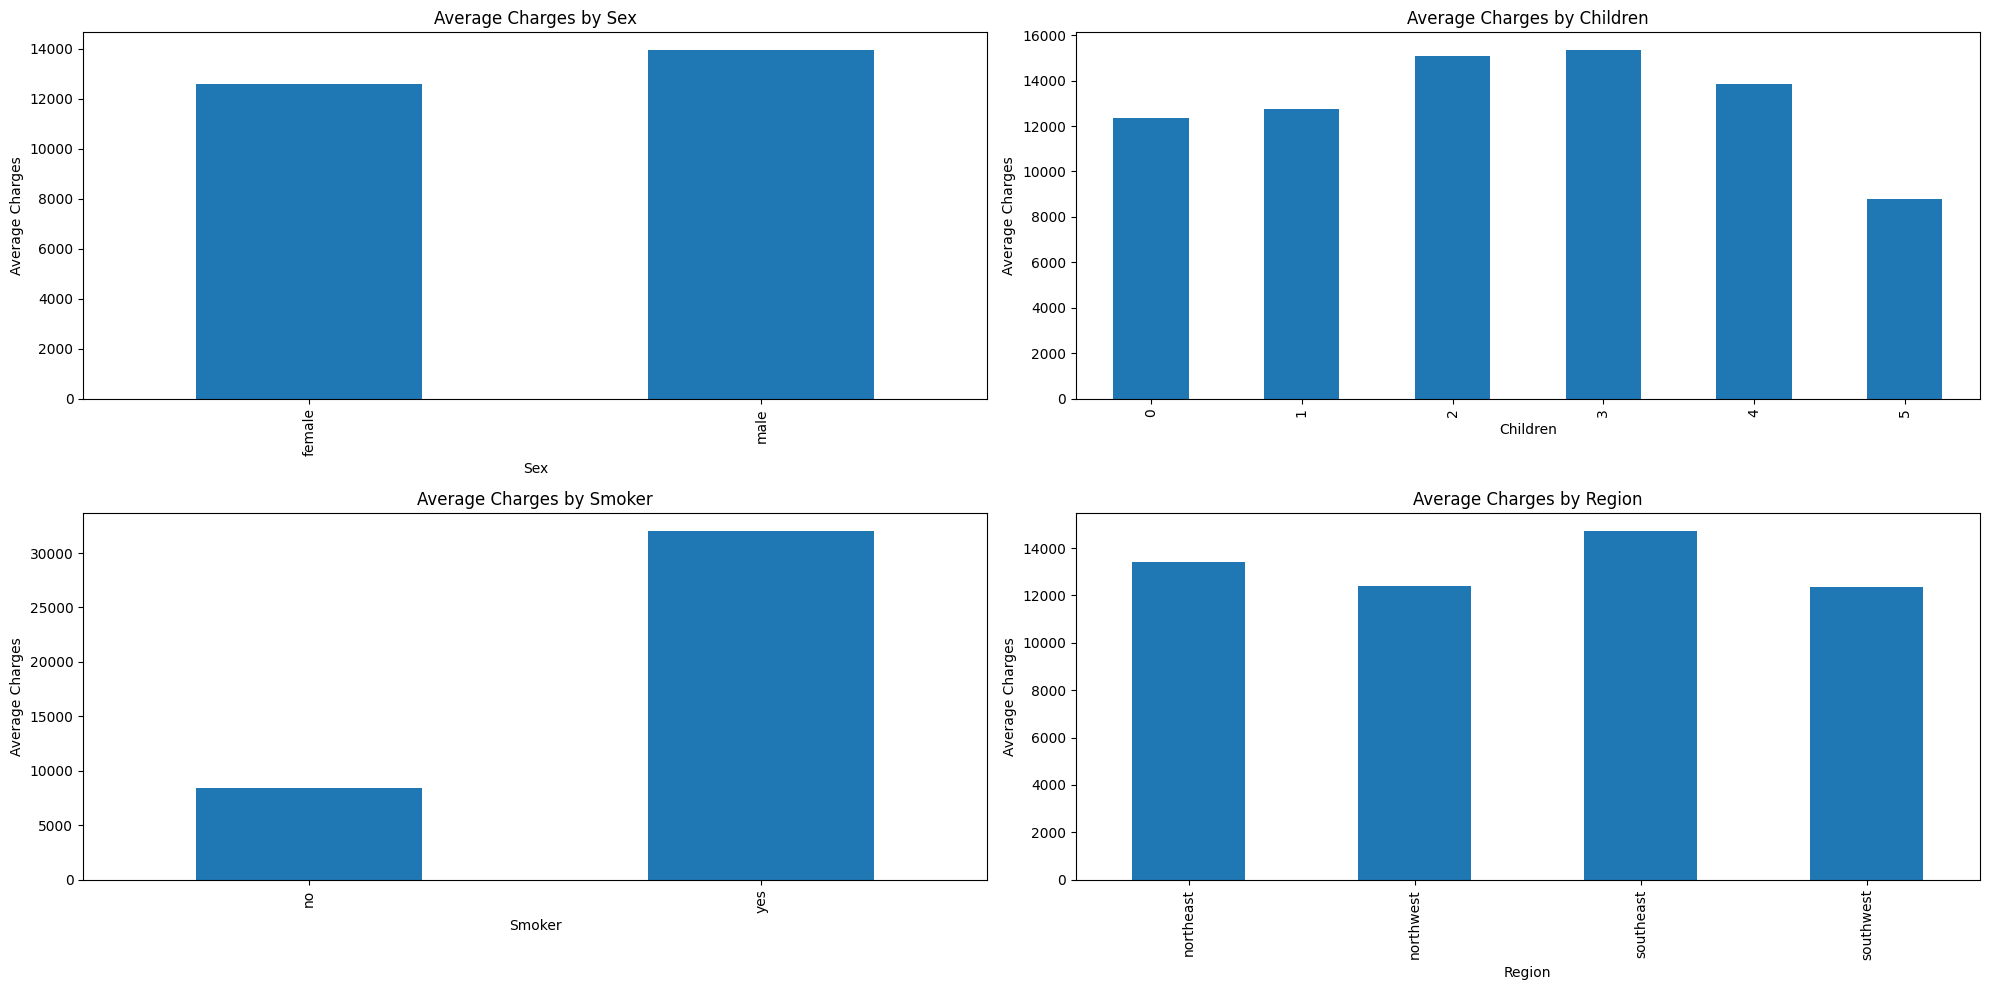

In [8]:
# Convert 'children' to numeric if it's not already
df['children'] = pd.to_numeric(df['children'], errors='coerce')

# Define the features for the plot
features = ['sex', 'children', 'smoker', 'region']

plt.figure(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df.groupby(col)['charges'].mean().plot(kind='bar')
    plt.title(f'Average Charges by {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Average Charges')
plt.tight_layout()
plt.show()

# Now let’s look at some of the observations which are shown in the above graphs:

# Charges are on the higher side for males as compared to females but the difference is not that much.
# Premium charged from the smoker is around thrice that which is charged from non-smokers.
# Charges are approximately the same in the given four regions.

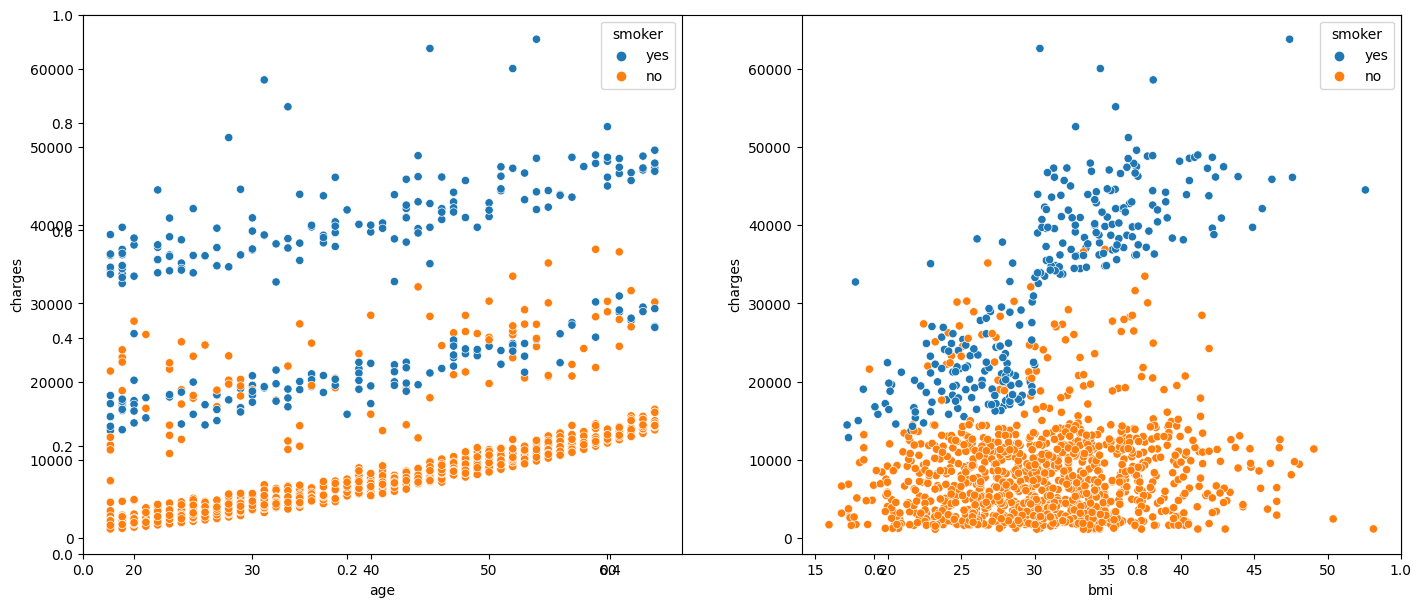

In [9]:
features = ['age', 'bmi']
 
plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(data=df, x=col,
                   y='charges',
                   hue='smoker')
plt.show()

DATA PREPROCESSING

Data preprocessing is technique to clean the unusual data like the missing values,wrong data,wrong format of data,duplicated data and the outliers.In this data we can observe that there are no missing values and wrong data.The only thing we can need to check is for duplicates and presence of outliers.

<Axes: >

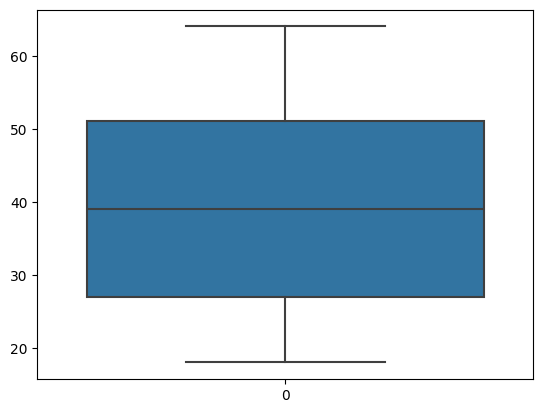

In [10]:
df.drop_duplicates(inplace=True)
sns.boxplot(df['age'])
# we can see that there are no outliers present in age column


<Axes: >

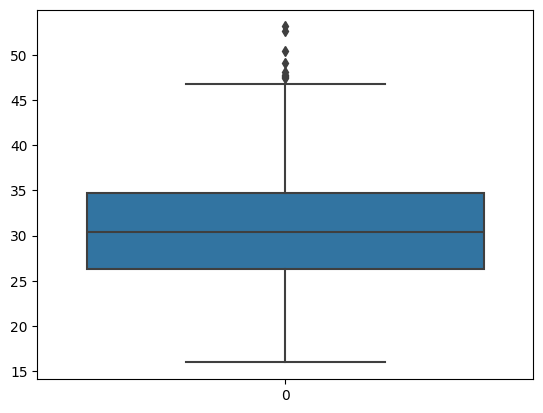

In [11]:
 sns.boxplot(df['bmi'])

# Due to the presence of outliers present in bmi column we need to treat the outliers by replacing the values with mean as the bmi column consists of continuous data.

In [12]:
Q1=df['bmi'].quantile(0.25)
Q2=df['bmi'].quantile(0.5)
Q3=df['bmi'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

13.674999999999994
47.31500000000001


from feature_engine.outliers import ArbitraryOutlierCapper
arb=ArbitraryOutlierCapper(min_capping_dict={'bmi':13.6749},max_capping_dict={'bmi':47.315})
df[['bmi']]=arb.fit_transform(df[['bmi']])
sns.boxplot(df['bmi'])
#Now we successfully treated the outliers .

Data Wrangling

Data wrangling is a technique to ensure whether the data follow normal or standard distribution and encode the discrete data for prediction.




In [13]:
df['bmi'].skew()


0.28391419385321137

In [14]:
df['age'].skew()

0.054780773126998195

Data in both the age and BMI column approximately follow a Normal distribution which is a good point with respect to the model’s learning.


Encoding

encoding is to be done for discrete categorical data (sex,bmi,region).

In [15]:
df['sex']=df['sex'].map({'male':0,'female':1})
df['smoker']=df['smoker'].map({'yes':1,'no':0})
df['region']=df['region'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})
#Now the discrete data is encoded and the data preprocessing and data wrangling part is completed.Now we can go for model development.

In [16]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,10600.54830
1334,18,1,31.920,0,0,1,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,3,2007.94500


In [17]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.019814,0.109344,0.041536,-0.025587,0.001771,0.298308
sex,0.019814,1.000000,-0.046397,-0.017848,-0.076596,-0.008998,-0.058044
bmi,0.109344,-0.046397,1.000000,0.012755,0.003746,0.156784,0.198401
children,0.041536,-0.017848,0.012755,1.000000,0.007331,-0.002842,0.067389
smoker,-0.025587,-0.076596,0.003746,0.007331,1.000000,0.012736,0.787234
region,0.001771,-0.008998,0.156784,-0.002842,0.012736,1.000000,0.010767
charges,0.298308,-0.058044,0.198401,0.067389,0.787234,0.010767,1.000000


Model Development-->
There are so many state-of-the-art ML models available in academia but some model fits better to some problem while some fit better than other. So, to make this decision we split our data into training and validation data. Then we use the validation data to choose the model with the highest performance.

In [18]:
X=df.drop(['charges'],axis=1)
Y=df[['charges']]
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
l1=[]
l2=[]
l3=[]
cvs=0
for i in range(40,50):
 xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=i)
 lrmodel=LinearRegression()
 lrmodel.fit(xtrain,ytrain)
 l1.append(lrmodel.score(xtrain,ytrain))
 l2.append(lrmodel.score(xtest,ytest))
 cvs=(cross_val_score(lrmodel,X,Y,cv=5,)).mean()
 l3.append(cvs)
 df1=pd.DataFrame({'train acc':l1,'test acc':l2,'cvs':l3})
df1

,train acc,test acc,cvs
0,0.741644,0.777985,0.746968
1,0.756269,0.706398,0.746968
2,0.729449,0.806103,0.746968
3,0.754323,0.732024,0.746968
4,0.742720,0.780108,0.746968
5,0.753305,0.731034,0.746968
6,0.741163,0.776345,0.746968
7,0.731589,0.796789,0.746968
8,0.751825,0.741619,0.746968
9,0.756238,0.722500,0.746968


After dividing the data into training and validation data it is considered a better practice to achieve stable and fast training of the model.We have identified the best random_state number for this data set as 42 .Now we fix this random_state and try with different ml algorithms for better score or accuracy.




In [19]:
#Now let’s train some state-of-the-art machine learning models on the training
#data and then use the validation data for choosing the best out of them for prediction.




# Split the dataset into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)  
# X: features, Y: target variable
# test_size=0.2: 20% of the data will be used as the test set
# random_state=42: ensures reproducibility

# Initialize the LinearRegression model
lrmodel = LinearRegression()

# Train the model on the training data
lrmodel.fit(xtrain, ytrain)

# Evaluate the model's performance on the training set
print("Training set R2 score:", lrmodel.score(xtrain, ytrain))  
# lrmodel.score returns the R² score, which is a measure of how well the model explains the variance in the training set

# Evaluate the model's performance on the test set
print("Test set R2 score:", lrmodel.score(xtest, ytest))  
# lrmodel.score returns the R² score, which is a measure of how well the model generalizes to the test set

# Perform 5-fold cross-validation on the entire dataset and print the mean R2 score
print("Cross-validation mean R2 score:", cross_val_score(lrmodel, X, Y, cv=5).mean())  
# cross_val_score performs 5-fold cross-validation and returns the R² scores for each fold
# The mean() function calculates the average R² score across all folds

Training set R2 score: 0.729449036210828
Test set R2 score: 0.8061028038524825
Cross-validation mean R2 score: 0.7469679900466865


In [20]:
from sklearn.metrics import r2_score  # Import r2_score for evaluating the model's performance
from sklearn.svm import SVR  # Import the Support Vector Regressor model

svrmodel = SVR()  # Initialize the Support Vector Regressor model
svrmodel.fit(xtrain, ytrain)  # Train the model on the training data

ypredtrain1 = svrmodel.predict(xtrain)  # Make predictions on the training set
ypredtest1 = svrmodel.predict(xtest)  # Make predictions on the test set
print("SVR")
# Evaluate the model's performance using the R2 score
print(r2_score(ytrain, ypredtrain1))  # Print the R2 score for the training set predictions
print(r2_score(ytest, ypredtest1))  # Print the R2 score for the test set predictions

# Perform 5-fold cross-validation on the entire dataset and print the mean R2 score
print(cross_val_score(svrmodel, X, Y, cv=5).mean())


SVR
-0.10151181672467358
-0.13444553609701226
-0.10374355553412987


In [21]:

# Initial RandomForestRegressor model training and evaluation
rfmodel = RandomForestRegressor(random_state=42)  # Initialize the RandomForestRegressor with a fixed random state for reproducibility
rfmodel.fit(xtrain, ytrain)  # Train the model on the training data

# Predictions on training and testing data
ypredtrain2 = rfmodel.predict(xtrain)  # Predict on the training set
ypredtest2 = rfmodel.predict(xtest)  # Predict on the test set

# Evaluation of the initial model
print(r2_score(ytrain, ypredtrain2))  # Print the R2 score for the training set predictions
print(r2_score(ytest, ypredtest2))  # Print the R2 score for the test set predictions
print(cross_val_score(rfmodel, X, Y, cv=5).mean())  # Perform 5-fold cross-validation on the entire dataset and print the mean R2 score

# Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
estimator = RandomForestRegressor(random_state=42)  # Initialize another RandomForestRegressor for GridSearch
param_grid = {'n_estimators': [10, 40, 50, 98, 100, 120, 150]}  # Define the grid of hyperparameters to search over
grid = GridSearchCV(estimator, param_grid, scoring="r2", cv=5)  # Set up the GridSearchCV with 5-fold cross-validation and R2 scoring
grid.fit(xtrain, ytrain)  # Fit the grid search on the training data

# Output the best parameters found by GridSearchCV
print(grid.best_params_)  # Print the best parameters found during the grid search

# Retrain the model with the best parameters from GridSearchCV
rfmodel = RandomForestRegressor(random_state=42, n_estimators=120)  # Reinitialize the RandomForestRegressor with the best n_estimators
rfmodel.fit(xtrain, ytrain)  # Train the model on the training data

# Predictions with the retrained model
ypredtrain2 = rfmodel.predict(xtrain)  # Predict on the training set
ypredtest2 = rfmodel.predict(xtest)  # Predict on the test set

# Evaluation of the retrained model
print(r2_score(ytrain, ypredtrain2))  # Print the R2 score for the training set predictions with the retrained model
print(r2_score(ytest, ypredtest2))  # Print the R2 score for the test set predictions with the retrained model
print(cross_val_score(rfmodel, X, Y, cv=5).mean())  # Perform 5-fold cross-validation on the entire dataset and print the mean R2 score for the retrained model


0.9738161643742801
0.8819349806115804
0.8363084945977217
{'n_estimators': 120}
0.9746304366493532
0.8822618062611055
0.836689809669368


In [22]:

# Initialize the GradientBoostingRegressor model
gbmodel = GradientBoostingRegressor()

# Train the model on the training data
gbmodel.fit(xtrain, ytrain)

# Make predictions on the training and test sets
ypredtrain3 = gbmodel.predict(xtrain)
ypredtest3 = gbmodel.predict(xtest)

# Evaluate the model's performance using the R2 score
print(r2_score(ytrain, ypredtrain3))  # Print the R2 score for the training set predictions
print(r2_score(ytest, ypredtest3))  # Print the R2 score for the test set predictions

# Perform 5-fold cross-validation on the entire dataset and print the mean R2 score
print(cross_val_score(gbmodel, X, Y, cv=5).mean())

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [10, 15, 19, 20, 21, 50],  # Different values for the number of boosting stages
    'learning_rate': [0.1, 0.19, 0.2, 0.21, 0.8, 1]  # Different values for the learning rate
}

# Set up GridSearchCV with 5-fold cross-validation and R2 scoring
grid = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=param_grid, scoring="r2", cv=5)

# Fit GridSearchCV on the training data
grid.fit(xtrain, ytrain)

# Output the best parameters found by GridSearchCV
print(grid.best_params_)  # Print the best parameters found during the grid search

# Retrain the model with the best parameters from GridSearchCV
gbmodel = GradientBoostingRegressor(n_estimators=19, learning_rate=0.2)
gbmodel.fit(xtrain, ytrain)

# Make predictions with the retrained model
ypredtrain3 = gbmodel.predict(xtrain)
ypredtest3 = gbmodel.predict(xtest)

# Evaluate the retrained model's performance using the R2 score
print(r2_score(ytrain, ypredtrain3))  # Print the R2 score for the training set predictions with the retrained model
print(r2_score(ytest, ypredtest3))  # Print the R2 score for the test set predictions with the retrained model

# Perform 5-fold cross-validation on the entire dataset and print the mean R2 score for the retrained model
print(cross_val_score(gbmodel, X, Y, cv=5).mean())

0.8924206179804557
0.9034793022644777
0.8553962345770463
{'learning_rate': 0.2, 'n_estimators': 19}
0.8682397447116927
0.9017109716082662
0.8606041910125791


In [23]:
# Initialize the XGBRegressor model
xgmodel = XGBRegressor()

# Train the model on the training data
xgmodel.fit(xtrain, ytrain)

# Make predictions on the training and test sets
ypredtrain4 = xgmodel.predict(xtrain)
ypredtest4 = xgmodel.predict(xtest)

# Evaluate the model's performance using the R2 score
print(r2_score(ytrain, ypredtrain4))  # Print the R2 score for the training set predictions
print(r2_score(ytest, ypredtest4))  # Print the R2 score for the test set predictions

# Perform 5-fold cross-validation on the entire dataset and print the mean R2 score
print(cross_val_score(xgmodel, X, Y, cv=5).mean())

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [10, 15, 20, 40, 50],  # Different values for the number of boosting rounds
    'max_depth': [3, 4, 5],  # Different values for the maximum depth of a tree
    'gamma': [0, 0.15, 0.3, 0.5, 1]  # Different values for the minimum loss reduction required to make a further partition
}

# Set up GridSearchCV with 5-fold cross-validation and R2 scoring
grid = GridSearchCV(estimator=XGBRegressor(), param_grid=param_grid, scoring="r2", cv=5)

# Fit GridSearchCV on the training data
grid.fit(xtrain, ytrain)

# Output the best parameters found by GridSearchCV
print(grid.best_params_)  # Print the best parameters found during the grid search

# Retrain the model with the best parameters from GridSearchCV
xgmodel = XGBRegressor(n_estimators=grid.best_params_['n_estimators'],
                       max_depth=grid.best_params_['max_depth'],
                       gamma=grid.best_params_['gamma'])
xgmodel.fit(xtrain, ytrain)

# Make predictions with the retrained model
ypredtrain4 = xgmodel.predict(xtrain)
ypredtest4 = xgmodel.predict(xtest)

# Evaluate the retrained model's performance using the R2 score
print(r2_score(ytrain, ypredtrain4))  # Print the R2 score for the training set predictions with the retrained model
print(r2_score(ytest, ypredtest4))  # Print the R2 score for the test set predictions with the retrained model

# Perform 5-fold cross-validation on the entire dataset and print the mean R2 score for the retrained model
print(cross_val_score(xgmodel, X, Y, cv=5).mean())

0.995652437210083
0.8569003343582153
0.8084074139595032
{'gamma': 0, 'max_depth': 3, 'n_estimators': 10}
0.8624727725982666
0.9001389741897583
0.8616246938705444


<!-- Compare all Models--->
    Model               Train Accuracy      Test Accurace          CV score
  linearRegression       0.729                0.806               0.747
  SupportVectorMachine  -0.105               -0.134               0.103
  RandomForest           0.974                0.882               0.836
  GradientBoost          0.868                0.901               0.860
  XGboost                0.870                0.904               0.860
 
From the above table we can observe that XGBoost is the best model.Now we need to identify the important features for predicting of charges. -->
  

In [24]:
feats=pd.DataFrame(data=grid.best_estimator_.feature_importances_,index=X.columns,columns=['Importance'])
feats

,Importance
age,0.040045
sex,0.000000
bmi,0.126012
children,0.011154
smoker,0.815517
region,0.007272


In [25]:
important_features=feats[feats['Importance']>0.01]
important_features

,Importance
age,0.040045
bmi,0.126012
children,0.011154
smoker,0.815517


In [26]:

# Drop the 'sex' and 'region' columns from the DataFrame
df.drop(df[['sex', 'region']], axis=1, inplace=True)

# Prepare feature matrix 'X' by dropping the target variable 'charges' from the DataFrame
X = df.drop(['charges'], axis=1)

# Split the dataset into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the XGBRegressor model with the best parameters found earlier
finalmodel = XGBRegressor(n_estimators=15, max_depth=3, gamma=0)

# Train the model on the training data
finalmodel.fit(xtrain, ytrain)

# Make predictions on the training and test sets
ypredtrain4 = finalmodel.predict(xtrain)
ypredtest4 = finalmodel.predict(xtest)
print("final Model")
# Evaluate the model's performance using the R2 score
print("train accuracy :",r2_score(ytrain, ypredtrain4))  # Print the R2 score for the training set predictions
print("test accuracy :",r2_score(ytest, ypredtest4))  # Print the R2 score for the test set predictions

# Perform 5-fold cross-validation on the entire dataset and print the mean R2 score
print("CV score :",cross_val_score(finalmodel, X, Y, cv=5).mean())

final Model
train accuracy : 0.868110179901123
test accuracy : 0.901275098323822
CV score : 0.8627374053001404


In [27]:
#save model
from pickle import dump
dump(finalmodel,open('insurancemodelf.pkl','wb'))

In [28]:
#predict on  new data
new_data=pd.DataFrame({'age':19,'sex':'male','bmi':27.9,'children':0,'smoker':'yes','region':'northeast'},index=[0])
new_data['smoker']=new_data['smoker'].map({'yes':1,'no':0})
new_data=new_data.drop(new_data[['sex','region']],axis=1)
finalmodel.predict(new_data)

array([17705.727], dtype=float32)

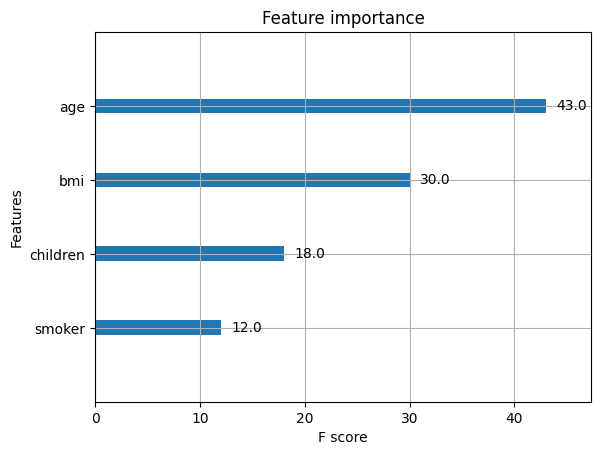

In [29]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(finalmodel)
plt.show()

In [30]:
print("Feature Importances:")
print(finalmodel.feature_importances_)

Feature Importances:
[0.03943289 0.08673113 0.01006387 0.8637721 ]
